# Project Objective:
 - Review the problem, Clean and perform data wrangling on the dataset
 - Explore to draw conclusions and insights from the dataset.
 
 - Then train the appropriate model and perform baseline comparison to prove how better your model beats the baseline
 - evaluate and communicate your model results
## Dataset:
   Buenos_aires_real estate.csv

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
df = pd.read_csv(r"C:\Users\Manager\Desktop\My_Projects\buenos_aires_property_prediction\data\buenos-aires-real-estate-1.csv")
df.head(1)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.0,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...


In [3]:
# df2 =pd.read_csv(r"‪C:\Users\Manager\Desktop\My_Projects\buenos_aires_property_prediction\data\buenos-aires-real-estate-2.csv")
# df3 = pd.read_csv(r"‪C:\Users\Manager\Desktop\My_Projects\buenos_aires_property_prediction\data\buenos-aires-real-estate-3.csv")
# df4 = pd.read_csv(r"‪C:\Users\Manager\Desktop\My_Projects\buenos_aires_property_prediction\data\buenos-aires-real-estate-4.csv")
# df5 = pd.read_csv(r"‪C:\Users\Manager\Desktop\My_Projects\buenos_aires_property_prediction\data\buenos-aires-real-estate-5.csv")
# data = pd.concat([df, df2, df3, df4, df5], axis =0, ignore_index=True)
# data.shape

In [4]:


#
paths = [
         r"‪C:\Users\Manager\Desktop\My_Projects\buenos_aires_property_prediction\data\buenos-aires-real-estate-2.csv",
         r"‪C:\Users\Manager\Desktop\My_Projects\buenos_aires_property_prediction\data\buenos-aires-real-estate-3.csv",
         r"‪C:\Users\Manager\Desktop\My_Projects\buenos_aires_property_prediction\data\buenos-aires-real-estate-4.csv",
         r"‪C:\Users\Manager\Desktop\My_Projects\buenos_aires_property_prediction\data\buenos-aires-real-estate-5.csv"
       ]
# # Clean hidden unicode characters and load CSVs
# def clean_path(p):
#     return p.encode("utf-8", "ignore").decode("utf-8").strip()

# dfs = [pd.read_csv(clean_path(p)) for p in paths]
# data = pd.concat(dfs, ignore_index=True)

# print("✅ Loaded successfully!")
# print(data.info())

import re

def clean_path(p):
    # Remove any Unicode control characters (like \u202a, \ufeff, etc.)
    cleaned = re.sub(r'[\u202a-\u202e\u200e\u200f\ufeff]', '', p)
    return cleaned.strip()
    
dfs = [pd.read_csv(clean_path(p)) for p in paths]
data = pd.concat(dfs, ignore_index=True)

In [5]:
data

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,PH,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,"-34.4281108,-58.5728848",160000.0,USD,2425984.00,160000.00,169.0,77.0,946.745562,2077.922078,NaN,NaN,NaN,http://tigre.properati.com.ar/i4rw_venta_depar...
1,sell,house,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Bena...,NaN,270000.0,USD,4093848.00,270000.00,790.0,221.0,341.772152,1221.719457,NaN,NaN,NaN,http://benavidez.properati.com.ar/n4go_venta_c...
2,sell,apartment,|Argentina|Capital Federal|Recoleta|,"-34.5889927,-58.4001326",215000.0,USD,3259916.00,215000.00,40.0,35.0,5375.000000,6142.857143,NaN,1.0,3500.0,http://recoleta.properati.com.ar/12j4v_venta_d...
3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5879654,-58.5862179",NaN,NaN,NaN,NaN,277.0,113.0,NaN,NaN,NaN,4.0,NaN,http://tres-de-febrero.properati.com.ar/um5c_v...
4,sell,apartment,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5995115,-58.5538716",90000.0,USD,1364616.00,90000.00,200.0,90.0,450.000000,1000.000000,NaN,3.0,NaN,http://tres-de-febrero.properati.com.ar/10yhb_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34418,sell,apartment,|Argentina|Bs.As. G.B.A. Zona Norte|San Fernan...,"-34.4498923,-58.5333348",191800.0,USD,2908148.32,191800.00,68.0,54.0,2820.588235,3551.851852,1.0,NaN,NaN,http://victoria.properati.com.ar/nj3n_venta_de...
34419,sell,house,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,"-34.5356489416,-58.4981208948",550000.0,USD,8339320.00,550000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://florida.properati.com.ar/j5jl_venta_cas...
34420,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5522215,-58.4448022",560000.0,USD,8490944.00,560000.00,137.0,126.0,4087.591241,4444.444444,NaN,3.0,7000.0,http://belgrano.properati.com.ar/12pck_venta_d...
34421,sell,apartment,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,"-34.580145797,-58.5542081641",180000.0,ARS,179500.37,11838.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://san-martin.properati.com.ar/edzj_venta_...


In [6]:
data.to_csv("buenos_aires_real_estate_combined.csv", index=False)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34423 entries, 0 to 34422
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   34423 non-null  object 
 1   property_type               34423 non-null  object 
 2   place_with_parent_names     34423 non-null  object 
 3   lat-lon                     27798 non-null  object 
 4   price                       30483 non-null  float64
 5   currency                    30482 non-null  object 
 6   price_aprox_local_currency  30483 non-null  float64
 7   price_aprox_usd             30483 non-null  float64
 8   surface_total_in_m2         23925 non-null  float64
 9   surface_covered_in_m2       29152 non-null  float64
 10  price_usd_per_m2            19554 non-null  float64
 11  price_per_m2                26122 non-null  float64
 12  floor                       5246 non-null   float64
 13  rooms                       190

In [8]:
data.isnull().sum()

operation                         0
property_type                     0
place_with_parent_names           0
lat-lon                        6625
price                          3940
currency                       3941
price_aprox_local_currency     3940
price_aprox_usd                3940
surface_total_in_m2           10498
surface_covered_in_m2          5271
price_usd_per_m2              14869
price_per_m2                   8301
floor                         29177
rooms                         15369
expenses                      30846
properati_url                     0
dtype: int64

In [9]:
# percentage of the missing values
missing_percent = (data.isnull().sum()/ len(data)) * 100
missing_percent

operation                      0.000000
property_type                  0.000000
place_with_parent_names        0.000000
lat-lon                       19.245853
price                         11.445836
currency                      11.448741
price_aprox_local_currency    11.445836
price_aprox_usd               11.445836
surface_total_in_m2           30.497051
surface_covered_in_m2         15.312436
price_usd_per_m2              43.194957
price_per_m2                  24.114691
floor                         84.760189
rooms                         44.647474
expenses                      89.608692
properati_url                  0.000000
dtype: float64

## DATA WRANGLING

In [10]:
def cleaned_data(
    df, 
    numeric_cols=None,        # numeric cols for outlier removal
    drop_cols=None,           # cols to drop
    rename_map=None,
):
    # Normalize column names
    df.columns = (
    df.columns.str.strip().str.lower().str.replace(" ", "_")
    )



     #  Drop unwanted columns
    if drop_cols:
        df = df.drop(columns=drop_cols, errors="ignore")

    
    # Rename columns (keys should match normalized col names)
    if rename_map:
        df = df.rename(columns=rename_map)


      
    # Split messy location data 
    if 'place_with_parent_names' in df.columns:
        parts = df['place_with_parent_names'].str.split('|', expand=True)
        if parts.shape[1] > 3:
            df['city'] = parts[3].str.strip()
            df = df.drop(columns=['place_with_parent_names'])



    #  Default numeric cols
    # if numeric_cols is None:
    #     numeric_cols = [ "surface_covered_in_m2"]


    
    # Outlier removal (IQR)
        for col in numeric_cols:
            if col in df.columns:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
                df = df[(df[col] >= lower) & (df[col] <= upper)]

    # Split lat-lon
    if "lat-lon" in df.columns:
        df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
        df = df.drop(columns=["lat-lon"])

    # Rename price
    if "price_aprox_usd" in df.columns:
        df = df.rename(columns={"price_aprox_usd": "price"})

    # --- Handle missing values
    # if drop_missing:
    #     df = df.dropna(axis=0, how="any")

    # --- Reset index
    df = df.reset_index(drop=True)

    return df


In [11]:
df = cleaned_data(data,
             numeric_cols=['price_aprox_usd', 'surface_covered_in_m2'],        # numeric cols for outlier removal
             drop_cols=['price_usd_per_m2', 'operation', 'price', 'currency', 
                        'price_aprox_local_currency', 'surface_total_in_m2', 
                        'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url']
      )

In [12]:
df.isnull().sum()

property_type               0
price                       0
surface_covered_in_m2       0
city                        0
lat                      4310
lon                      4310
dtype: int64

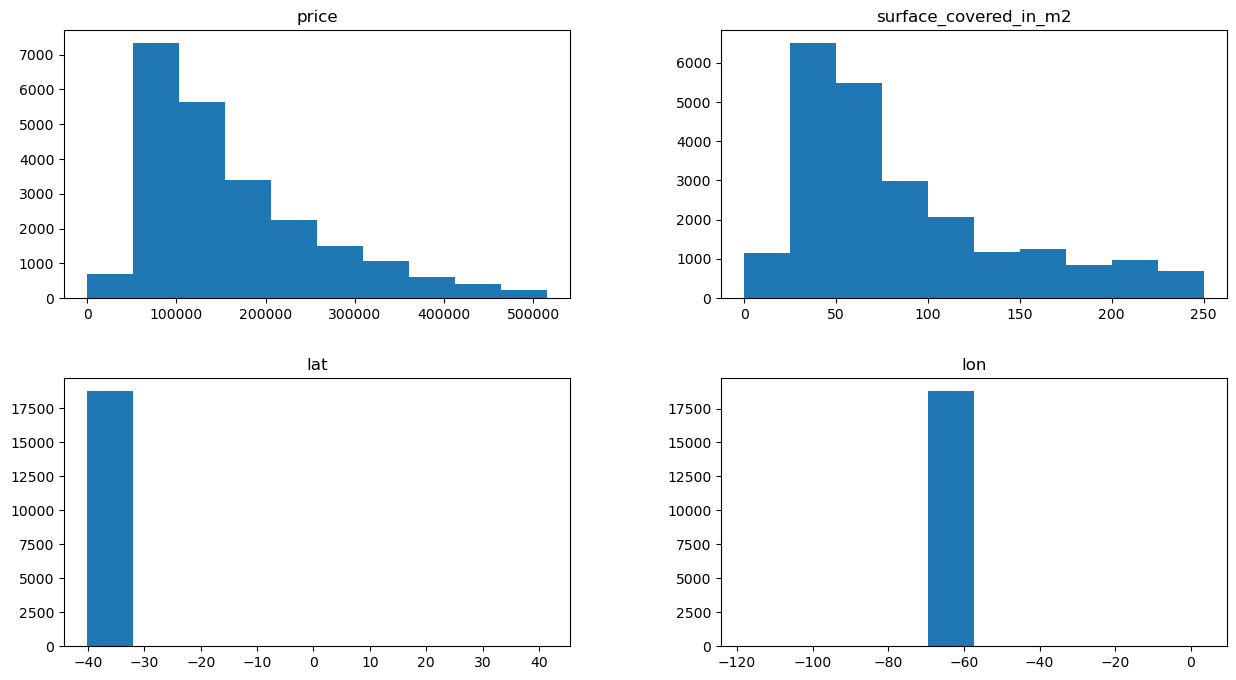

In [13]:
df.hist(figsize=(15,8), grid=False);

In [14]:
df.duplicated().sum()

1285

In [15]:
df.drop_duplicates(inplace =True)

In [16]:
df.dropna(axis = 0, how ='any', inplace = True)

In [17]:
df.shape

(18159, 6)

In [18]:
df

,property_type,price,surface_covered_in_m2,city,lat,lon
0,PH,160000.0,77.0,Tigre,-34.428111,-58.572885
2,apartment,215000.0,35.0,Recoleta,-34.588993,-58.400133
3,apartment,90000.0,90.0,Tres de Febrero,-34.599511,-58.553872
5,apartment,341550.0,90.0,Recoleta,-34.588044,-58.398066
6,PH,82000.0,50.0,Lanús,-34.655190,-58.352525
...,...,...,...,...,...,...
23102,house,230000.0,113.0,Monte Castro,-34.618300,-58.513741
23104,apartment,147750.0,81.0,Tigre,-34.415562,-58.579895
23106,house,75000.0,27.0,Parque Patricios,-34.644395,-58.415327
23108,apartment,89000.0,46.0,Monserrat,-34.620384,-58.387360


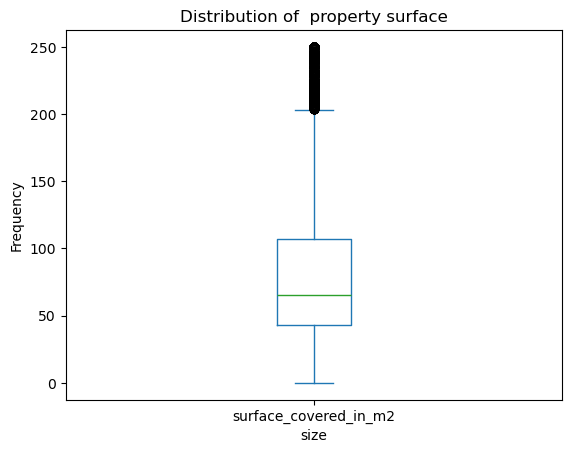

In [19]:
df['surface_covered_in_m2'].plot(kind='box')
plt.xlabel('size')
plt.ylabel('Frequency')
plt.title('Distribution of  property surface')
plt.show()

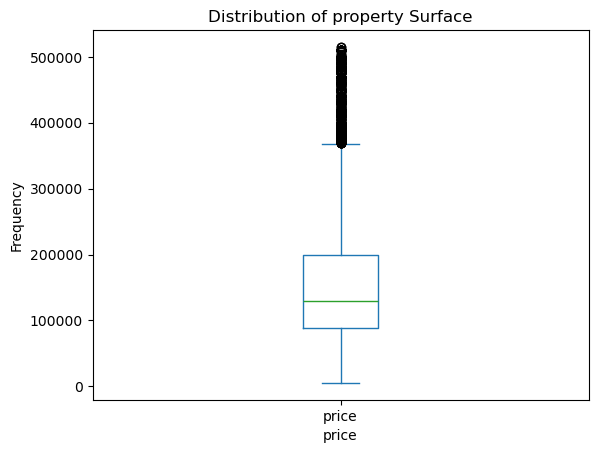

In [20]:
df['price'].plot(kind='box')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of property Surface')
plt.show()

In [21]:
df.describe()

,price,surface_covered_in_m2,lat,lon
count,18159.000000,18159.000000,18159.000000,18159.000000
mean,158564.588583,82.042623,-34.536894,-58.522628
std,94969.676990,54.941578,1.817438,1.462902
min,5195.790000,0.000000,-40.150049,-118.105833
25%,88000.000000,43.000000,-34.633328,-58.572266
50%,130000.000000,65.000000,-34.595152,-58.491034
75%,200000.000000,107.000000,-34.521322,-58.424331
max,515000.000000,250.000000,41.332267,3.379206


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()
le

LabelEncoder()

In [24]:
df

,property_type,price,surface_covered_in_m2,city,lat,lon
0,PH,160000.0,77.0,Tigre,-34.428111,-58.572885
2,apartment,215000.0,35.0,Recoleta,-34.588993,-58.400133
3,apartment,90000.0,90.0,Tres de Febrero,-34.599511,-58.553872
5,apartment,341550.0,90.0,Recoleta,-34.588044,-58.398066
6,PH,82000.0,50.0,Lanús,-34.655190,-58.352525
...,...,...,...,...,...,...
23102,house,230000.0,113.0,Monte Castro,-34.618300,-58.513741
23104,apartment,147750.0,81.0,Tigre,-34.415562,-58.579895
23106,house,75000.0,27.0,Parque Patricios,-34.644395,-58.415327
23108,apartment,89000.0,46.0,Monserrat,-34.620384,-58.387360


In [25]:
df.to_csv("buenos_aires_real_estate_data.csv", index = False)

In [26]:
df["property_type"].unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [27]:
# encode categorical feature
categorical_features = ['city','property_type']

In [28]:
# create an empty dictionary to store the original text and encoded number
encoded_value_map = {}
for col in categorical_features:
  df[col] = le.fit_transform(df[col])
 #dict(zip(le.classes_, range(len(le.classes_)))) this is a built-in-function that shows which class got which number
   # when label encoder transformed your label
  encoded_value_map[col] = dict(zip(le.classes_, range(len(le.classes_))))

# print("Encoded value mappings:")
# for col, mapping in encoded_value_map.items():
#   print(f"Column '{col}': {mapping}")
print(encoded_value_map)

{'city': {'': 0, 'Abasto': 1, 'Agronomía': 2, 'Almagro': 3, 'Almirante Brown': 4, 'Avellaneda': 5, 'Balvanera': 6, 'Barracas': 7, 'Barrio Norte': 8, 'Belgrano': 9, 'Berazategui': 10, 'Boca': 11, 'Boedo': 12, 'Caballito': 13, 'Catalinas': 14, 'Cañuelas': 15, 'Centro / Microcentro': 16, 'Chacarita': 17, 'Coghlan': 18, 'Colegiales': 19, 'Congreso': 20, 'Constitución': 21, 'Escobar': 22, 'Esteban Echeverría': 23, 'Ezeiza': 24, 'Florencio Varela': 25, 'Flores': 26, 'Floresta': 27, 'General Rodríguez': 28, 'General San Martín': 29, 'Hurlingham': 30, 'Ituzaingó': 31, 'José C Paz': 32, 'La Matanza': 33, 'La Plata': 34, 'Lanús': 35, 'Las Cañitas': 36, 'Liniers': 37, 'Lomas de Zamora': 38, 'Malvinas Argentinas': 39, 'Marcos Paz': 40, 'Mataderos': 41, 'Merlo': 42, 'Monserrat': 43, 'Monte Castro': 44, 'Moreno': 45, 'Morón': 46, 'Nuñez': 47, 'Once': 48, 'Palermo': 49, 'Parque Avellaneda': 50, 'Parque Centenario': 51, 'Parque Chacabuco': 52, 'Parque Chas': 53, 'Parque Patricios': 54, 'Paternal': 55,

In [29]:
df

,property_type,price,surface_covered_in_m2,city,lat,lon
0,0,160000.0,77.0,71,-34.428111,-58.572885
2,1,215000.0,35.0,61,-34.588993,-58.400133
3,1,90000.0,90.0,72,-34.599511,-58.553872
5,1,341550.0,90.0,61,-34.588044,-58.398066
6,0,82000.0,50.0,35,-34.655190,-58.352525
...,...,...,...,...,...,...
23102,2,230000.0,113.0,44,-34.618300,-58.513741
23104,1,147750.0,81.0,71,-34.415562,-58.579895
23106,2,75000.0,27.0,54,-34.644395,-58.415327
23108,1,89000.0,46.0,43,-34.620384,-58.387360


In [30]:
import seaborn as sns
correlation_matrix = df.corr()

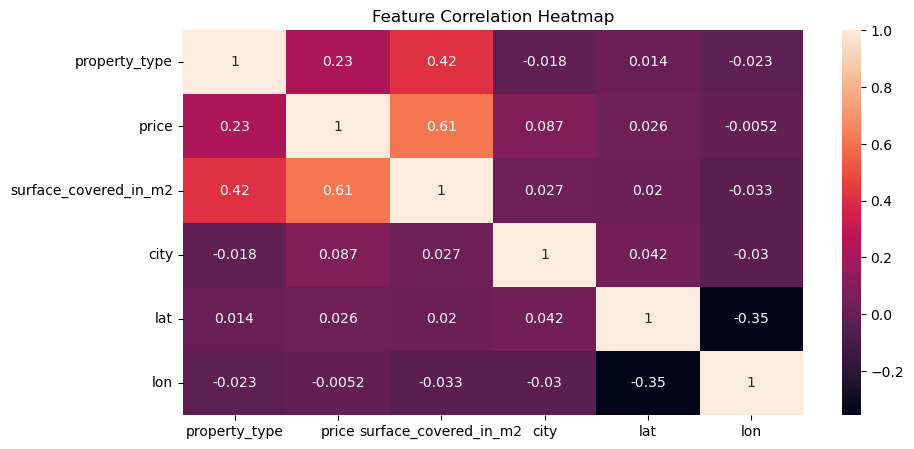

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Feature Correlation Heatmap")
plt.savefig("Feature Correlation Heatmap.png", dpi = 300, bbox_inches="tight")
plt.show()

In [32]:
df.dtypes

property_type              int32
price                    float64
surface_covered_in_m2    float64
city                       int32
lat                      float64
lon                      float64
dtype: object

# exploratory data analysis

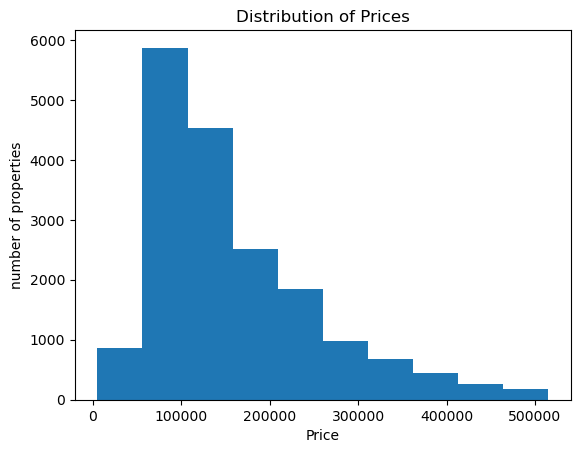

In [33]:
df['price'].plot(kind='hist')
plt.xlabel('Price')
plt.ylabel('number of properties')
plt.title('Distribution of Prices')
plt.savefig("Price Distribution.png", dpi = 300, bbox_inches="tight")
plt.show()

# Observation
 Using histogram plot to visualize the distribution of prices: the price distribution is right skewed, meaning we have more properties clustering from  0 -250,000usd which are considered affordable, we also have some stretched out to 500,000usd - 500000usd which are considered as the few expensive 

In [34]:
# # Price vs Surface
# data.plot.scatter(x='surface_covered_in_m2', y='price', alpha=0.5)
# plt.title("Price vs Surface covered Area")
# plt.savefig("surface covered area vs price.png", dpi=300, bbox_inches="tight")
# plt.show()

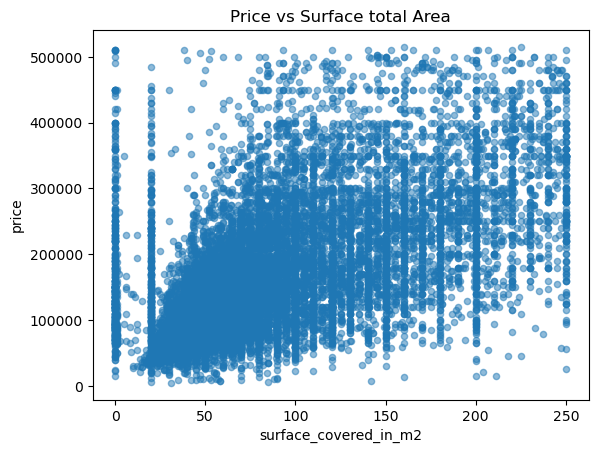

In [35]:
# Price vs Surface
df.plot.scatter(x='surface_covered_in_m2', y='price', alpha= 0.5)
plt.title("Price vs Surface total Area")
plt.savefig("surface total area vs price.png", dpi = 300, bbox_inches="tight")
plt.show()

# Observation
     This scatter plot shows that surface covered area is positively related to price
  - Most properties are  up on the left
  - The majority of homes have surface areas less than 200 m².
  - Prices mostly stay below 400,000 USD.
  - Some properties go way above  250 m², which are extremely large
  - Some prices shoot up above 500,000 USD, these are rare luxury properties or data entry mistakes.
 

In [36]:
#getting the average price groupby cities
avg_price_city =df.groupby(df['city'].map({v:k for k,v in encoded_value_map['city'].items()}))['price'].mean().sort_values(ascending=False).head(20)
avg_price_city.round()              

city
Catalinas             350000.0
Puerto Madero         313427.0
Recoleta              228529.0
Cañuelas              227500.0
Las Cañitas           221589.0
                      217993.0
Vicente López         213224.0
San Isidro            213131.0
Barrio Norte          207026.0
Tigre                 206626.0
Belgrano              202645.0
San Vicente           196659.0
Ezeiza                196290.0
Palermo               194735.0
Berazategui           194385.0
Escobar               191635.0
Versalles             189278.0
Presidente Perón      187173.0
Nuñez                 179482.0
Esteban Echeverría    178162.0
Name: price, dtype: float64

In [37]:
df.corr()

,property_type,price,surface_covered_in_m2,city,lat,lon
property_type,1.000000,0.225884,0.415828,-0.017544,0.014307,-0.022503
price,0.225884,1.000000,0.611366,0.087308,0.025817,-0.005183
surface_covered_in_m2,0.415828,0.611366,1.000000,0.026652,0.020031,-0.032569
city,-0.017544,0.087308,0.026652,1.000000,0.041854,-0.029560
lat,0.014307,0.025817,0.020031,0.041854,1.000000,-0.354683
lon,-0.022503,-0.005183,-0.032569,-0.029560,-0.354683,1.000000


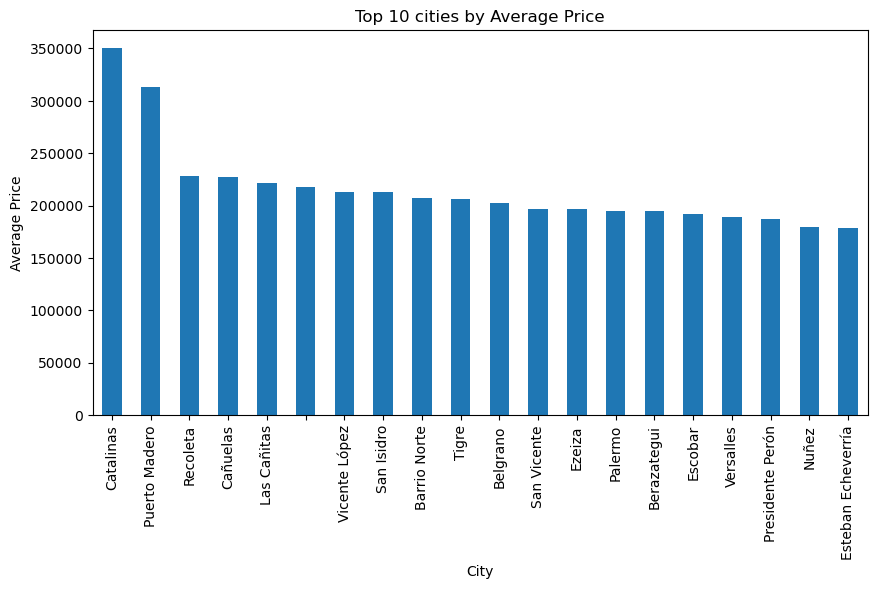

In [38]:
avg_price_city.plot(kind='bar', figsize=(10,5)) 
plt.title("Top 10 cities by Average Price")
plt.xlabel("City")
plt.ylabel("Average Price")
plt.savefig("avg price by city.png", dpi=300, bbox_inches="tight")
plt.show()

# Observation
   Catalinas and Puerto Madero has the highest average property prices, while Recoleta and the rest are much more affordable.

In [40]:
avg_price_by_type = df.groupby(df['property_type'].map({v:k for k,v in encoded_value_map['property_type'].items()}))['price'].mean().sort_values(ascending=False).head(20)
avg_price_by_type.round()              

property_type
house        202869.0
store        156054.0
apartment    143636.0
PH           135539.0
Name: price, dtype: float64

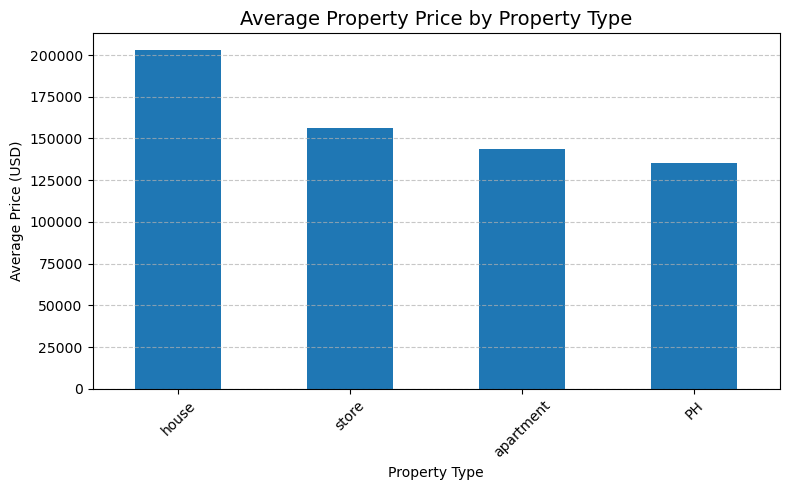

In [42]:
# Group by property type and calculate average price
# avg_price_by_type = df.groupby("property_type")["price"].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(8,5))
avg_price_by_type.plot(kind="bar")
plt.title("Average Property Price by Property Type", fontsize=14)
plt.xlabel("Property Type")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("avg price by type.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
# Observation
 On Average houses tend to be priced more higher than store and the rest

# Baseline Comparison

In [ ]:
# features and target
x = df.drop('price', axis = 1)
y = df['price']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
len(X_test), len(y_test)

In [ ]:
len(X_train), len(y_train)

In [ ]:
# MEDIAN BASLINE
y_median = y_test.median()
# y_pred_baseline_med = [y_median] * len(y_test)
# mae_median =mean_absolute_error(y_test, y_pred_baseline_med)
# rmse_median = mean_squared_error(y_test, y_pred_baseline_med, squared=False)

# print("Median Baseline MAE:", mae_median.round())
# print("Median Baseline RMSE:", rmse_median.round()) 




from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred_baseline_med = [y_median] * len(y_test)

mae_median = mean_absolute_error(y_test, y_pred_baseline_med)
rmse_median = np.sqrt(mean_squared_error(y_test, y_pred_baseline_med))

print("Median Baseline MAE:", round(mae_median, 2))
print("Median Baseline RMSE:", round(rmse_median, 2))


In [ ]:
# MEAN BASLINE
y_mean = y_test.mean()
y_pred_baseline = [y_mean] * len(y_test)
mae_mean =mean_absolute_error(y_test, y_pred_baseline)
rmse_mean = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

print("Mean Baseline MAE:", round(mae_mean,2))
print("Mean Baseline RMSE:", round(rmse_mean, 2)) 

In [ ]:
# MEDIAN BASLINE
# Calculate the median price from the target data
median_price = y_test.median()

# Create predictions for the test set
# We fill an array with the same value (median_price) for every test row
baseline_pred_median = pd.Series(median_price, index=y_test.index)

# Evaluate how good this baseline is by calculating the error against the true value
# MAE = mean absolute error (average difference in price)
# RMSE = root mean squared error (penalizes big mistakes more)
mae_median = mean_absolute_error(y_test, baseline_pred_median)
rmse_median = np.sqrt(mean_squared_error(y_test, baseline_pred_median ))

print("Median Baseline MAE:", round(mae_median, 2 ))
print("Median Baseline RMSE:", round(rmse_median, 2 ))

In [ ]:
   # MEAN BASELINE
mean_price = y_test.mean()
base_pred_mean = pd.Series(mean_price, index= y_test.index)
mae_mean =mean_absolute_error(y_test, base_pred_mean)
rmse_mean = np.sqrt(mean_squared_error(y_test, base_pred_mean))

print("Mean Baseline MAE:", round(mae_mean, 2 ))
print("Mean Baseline RMSE:", round(rmse_mean, 2 ))

# PRICE VS SIZE

In [ ]:
plt.figure(figsize=(7,5))
x = df['surface_covered_in_m2'][:100]
y = df['price'][:100]
plt.scatter(x,y, alpha=0.5)
plt.xlabel('Area [SQ metter]')
plt.ylabel('Price [USD]')
plt.savefig("PRICE VS SIZE.png", dpi=300, bbox_inches="tight")
plt.show()

# Observation
   The Surface SQ_M2 is showing us that properties from 20 to 150m2 are quite more affordable,
   the price ranges from 100000usd to 200000usd and there are still few expensive properties 
   within the same SQ_M2 and it also shows that the larger the SQ_M2 the higher the prices in some
   properties 

In [ ]:
X = df[['surface_covered_in_m2']]
y = df['price']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_test), len(y_test)

In [ ]:
len(X_train), len(y_train)

# Baseline Comparison

In [ ]:
plt.plot(X_test.values, y_pred_baseline, color='orange', label='Baseline model', linewidth=2)
plt.scatter(X_test, y_test)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

In [ ]:
MODEL1 = RandomForestRegressor(n_estimators=100,random_state=42)
MODEL1

In [ ]:
MODEL1.fit(X_train, y_train)

In [ ]:
y_pred = MODEL1.predict(X_test)
y_pred

In [ ]:
MODEL1.score(X_test, y_test)

In [ ]:
MODEL1.score(X_train, y_train)

In [ ]:
MODEL2 = LinearRegression()
MODEL2.fit(X_train, y_train)

In [ ]:
y_pred2 = MODEL2.predict(X_test)
y_pred2

In [ ]:
MODEL2.score(X_test, y_test)

In [ ]:
MODEL2.score(X_train, y_train)

In [ ]:
# RANDOM FOREST PERFORMANCE
MODEL_mae =mean_absolute_error(y_test, y_pred)
MODEL_rmse = np.sqrt(mean_squared_error(y_test, y_pred ))

print("MAE:", round(MODEL_mae, 2 ))
print("RMSE:", round(MODEL_rmse, 2 ))

In [ ]:
# LINEAR REGRESSION PERFORMANCE
MODEL2_mae =mean_absolute_error(y_test, y_pred2)
MODEL2_rmse = np.sqrt(mean_squared_error(y_test, y_pred2 ))

print("MAE:", round(MODEL2_mae, 2 ))
print("RMSE:", round(MODEL2_rmse, 2 ))

In [ ]:
# compare result

if MODEL_mae <  mae_median:
    print("Random Forest beats baseline!")
else:
    print("Random Forest does NOT beat baseline.")

In [ ]:
if MODEL_rmse <  rmse_median:
    print("Random Forest beats baseline!")
else:
    print("Random Forest does NOT beat baseline.")

# Price Vs Location

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='lon',
    width=600,
    height=600,
    color='price',
    hover_data=['price'],
    color_continuous_scale = 'plasma',
    zoom = 10
)

fig.update_layout(mapbox_style='open-street-map')
plt.savefig("PRICE VS LOCATION.png", dpi=300, bbox_inches="tight")
fig.show()

# Observation

The geospatial visualization above shows the distribution of property prices across Buenos Aires, with each point representing a property’s location and color intensity corresponding to its price level.

From the color gradient (purple → yellow), we observe that:
	•	Higher-priced properties (in yellow and orange) are concentrated around the northeastern part of Buenos Aires, particularly close to the waterfront and central city areas.
	•	Lower-priced properties (in dark purple) are more widespread toward the southwestern and outer regions, farther from the coast and central zones.

  The visualization indicates a clear relationship between location and property prices in Buenos Aires. Properties situated closer to the coast and city center tend to have higher prices, while those in the outer and less central areas are generally lower in value.

  This pattern indicates that location has a significant impact on price. People are likely willing to pay more to live near the waterfront or busy central areas. The large number of high-priced homes around those places also suggests that wealthy individuals or buyers with high demand are mostly concentrated there.

In [ ]:
df.head(1)

In [ ]:
X = df[['lat', 'lon']]
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_test), len(y_test)

In [ ]:
model3 = RandomForestRegressor(n_estimators=100,random_state=42)
model3

In [ ]:
model3.fit(X_train, y_train)

In [ ]:
y_pred3 = model3.predict(X_test)
y_pred3

In [ ]:
model3.score(X_test, y_test)

In [ ]:
model3.score(X_train, y_train)

In [ ]:
# RANDOM FOREST PERFORMANCE
model3_mae =mean_absolute_error(y_test, y_pred3)
model3_rmse = np.sqrt(mean_squared_error(y_test, y_pred3))

print("MAE:", round(model3_mae, 2 ))
print("RMSE:", round(model3_rmse, 2 ))

# PRICE VS CITY

In [ ]:
#getting the average price groupby cities
avg_price_city =df.groupby(df['city'].map({v:k for k,v in encoded_value_map['city'].items()}))['price'].mean().sort_values(ascending=False).head(30)
avg_price_city.round() 

In [ ]:
plt.figure(figsize=(12,6))
avg_price_city.plot.bar()
plt.show()

In [ ]:
X = df[['city']]
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model4 = RandomForestRegressor(n_estimators=100,random_state=42)
model4

In [ ]:
model4.fit(X_train, y_train)

In [ ]:
y_pred4 = model4.predict(X_test)
y_pred4

In [ ]:
model4.score(X_test, y_test)

In [ ]:
model4.score(X_train, y_train)

In [ ]:
# RANDOM FOREST PERFORMANCE
model4_mae =mean_absolute_error(y_test, y_pred4)
model4_rmse = np.sqrt(mean_squared_error(y_test, y_pred4 ))

print("MAE:", round(model4_mae, 2 ))
print("RMSE:", round(model4_rmse, 2 )) 

# PRICE AND ALL VARIABLE

In [ ]:
# features and target
x = df.drop('price', axis = 1)
y = df['price']

In [ ]:
x

In [ ]:
y

In [ ]:
print(len(x), len(y))

In [ ]:
plt.hist(x)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
f_model = RandomForestRegressor(n_estimators=100,random_state=42)
f_model

In [ ]:
f_model.fit(X_train, y_train)

In [ ]:
f_y_pred = f_model.predict(X_test)
f_y_pred

In [ ]:
f_model.score(X_test, y_test)

In [ ]:
f_model_mae =mean_absolute_error(y_test, f_y_pred)
f_model_rmse = np.sqrt(mean_squared_error(y_test, f_y_pred ))

print("MAE:", round(f_model_mae, 2 ))
print("RMSE:", round(f_model_rmse, 2 )) 

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# Define K-Fold Cross Validation
# Splits dataset into 5 parts (folds)
# Train on 4 folds, test on the 1 left out
#  Repeats until every fold has been used as test once
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
results = []
#kf.split(X) gives back train and test row indexex for each fold, it tells you which rows go into training and testing
for train_index, test_index in kf.split(x):
    #iloc selects those rows from the features and target using the train_index and test_index
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

In [ ]:
model = RandomForestRegressor(n_estimators=100,random_state=42)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
R2_Score = model.score(X_test, Y_test)
R2_Score

In [ ]:
model_mae =mean_absolute_error(Y_test, y_pred)
model_rmse = np.sqrt(mean_squared_error(Y_test, y_pred ))

print("MAE:", round(model_mae, 2 ))
print("RMSE:", round(model_rmse, 2 )) 

In [ ]:
# compare result

if model_mae <  mae_median:
    print("Random Forest beats baseline!")
else:
    print("Random Forest does NOT beat baseline.")

In [ ]:
# MEAN BASLINE
y_mean = y_test.mean()
y_pred_baseline = [y_mean] * len(y_test)
mae_mean =mean_absolute_error(y_test, y_pred_baseline)
rmse_mean = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

print("Mean Baseline MAE:", round(mae_mean,2))
print("Mean Baseline RMSE:", round(rmse_mean, 2)) 

In [ ]:
Evaluation_df = pd.DataFrame({
                            'Model' : [ 'Baseline', 'Random Forest'],
                            'MAE' : [mae_mean,  model_mae,  ],
                            'RMSE' :[ rmse_mean, model_rmse,],
                            'R\u00B2' :[ 0,  R2_Score]
})       

In [ ]:
Evaluation_df = Evaluation_df.round()
Evaluation_df

In [ ]:
Evaluation_df.to_csv("model_evaluation_results.csv", index = False)

In [ ]:
Evaluation_df

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'house_price_model_1.pkl')
print("Model saved successfully!")